In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('summer.csv')
data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [4]:
data.shape

(31165, 9)

In [5]:
data.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,31165.0,1970.482785,33.158416,1896.0,1948.0,1980.0,2000.0,2012.0


In [8]:
data.describe(include='object').T

,count,unique,top,freq
City,31165,22,London,3567
Sport,31165,43,Aquatics,4170
Discipline,31165,67,Athletics,3638
Athlete,31165,22762,"PHELPS, Michael",22
Country,31161,147,USA,4585
Gender,31165,2,Men,22746
Event,31165,666,Football,1497
Medal,31165,3,Gold,10486


In [9]:
data.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [10]:
data = data.dropna()

In [11]:
data.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64

In [12]:
data[data.duplicated()]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
16099,1980,Moscow,Hockey,Hockey,"SINGH, Singh",IND,Men,Hockey,Gold
29785,2012,London,Badminton,Badminton,"ZHAO, Yunlei",CHN,Women,Doubles,Gold


In [13]:
data = data.drop_duplicates()

In [14]:
data[data.duplicated()]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal


## Summer Olympics Data Analysis Assignment

**1. In how many cities Summer Olympics is held so far?**

In [15]:
data['City'].value_counts()

London                   3562
Athens                   2149
Los Angeles              2074
Beijing                  2042
Sydney                   2015
Atlanta                  1859
Barcelona                1705
Seoul                    1546
Paris                    1396
Moscow                   1386
Montreal                 1305
Antwerp                  1298
Munich                   1185
Mexico                   1031
Tokyo                    1010
Helsinki                  889
Melbourne / Stockholm     885
Stockholm                 885
Rome                      882
Berlin                    875
Amsterdam                 710
St Louis                  470
Name: City, dtype: int64

In [16]:
data['City'].unique()

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

In [17]:
res1 = len(data['City'].unique())
res1

22

In [18]:
print(f"Summer Olympics is held so far in {res1} cities")

Summer Olympics is held so far in 22 cities


**2. Which sport is having most number of Gold Medals so far? (Top 5)**

In [39]:
sport = data['Sport'][data['Medal']=='Gold']
sport.value_counts()

Aquatics             1421
Athletics            1214
Rowing                890
Gymnastics            820
Fencing               552
Football              503
Hockey                485
Sailing               412
Wrestling             391
Shooting              384
Cycling               371
Basketball            342
Canoe / Kayak         334
Volleyball            332
Handball              321
Equestrian            320
Boxing                239
Weightlifting         199
Archery               126
Judo                  123
Baseball              111
Tennis                 92
Rugby                  78
Softball               60
Modern Pentathlon      60
Table Tennis           46
Badminton              45
Tug of War             36
Taekwondo              32
Lacrosse               28
Canoe                  27
Polo                   22
Golf                   13
Cricket                12
Skating                 9
Ice Hockey              8
Triathlon               8
Water Motorsports       5
Croquet     

In [40]:
print("Top 5 Sport having most number of Gold Medals so far")
sport.value_counts()[:5]

Top 5 Sport having most number of Gold Medals so far


Aquatics      1421
Athletics     1214
Rowing         890
Gymnastics     820
Fencing        552
Name: Sport, dtype: int64

<BarContainer object of 5 artists>

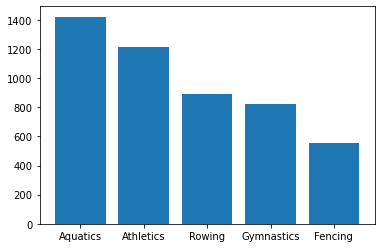

In [41]:
top5_sport = sport.value_counts()[:5]
plt.bar(top5_sport.index ,top5_sport)

**3. Which sport is having most number of medals so far? (Top 5)**

In [43]:
sport = data['Sport'].value_counts()
sport

Aquatics             4170
Athletics            3637
Rowing               2667
Gymnastics           2307
Fencing              1613
Football             1497
Hockey               1421
Wrestling            1211
Shooting             1150
Sailing              1109
Cycling              1105
Basketball           1012
Canoe / Kayak        1002
Volleyball            994
Handball              973
Equestrian            939
Boxing                894
Weightlifting         591
Judo                  491
Baseball              335
Archery               329
Tennis                296
Rugby                 192
Modern Pentathlon     180
Softball              180
Table Tennis          144
Badminton             143
Taekwondo             112
Tug of War             94
Canoe                  81
Polo                   66
Lacrosse               59
Golf                   30
Skating                27
Ice Hockey             27
Triathlon              24
Cricket                24
Rackets                10
Croquet     

In [44]:
print("Top 5 Sport having most number Medals so far")
sport[:5]

Top 5 Sport having most number  Medals so far


Aquatics      4170
Athletics     3637
Rowing        2667
Gymnastics    2307
Fencing       1613
Name: Sport, dtype: int64

<BarContainer object of 5 artists>

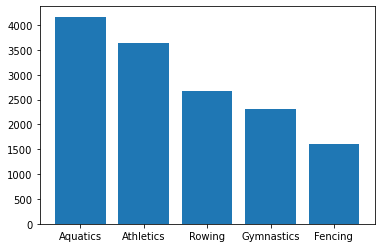

In [45]:
top5_most_medal = sport[:5]
plt.bar(top5_most_medal.index ,top5_most_medal)

**4. Which player has won most number of medals? (Top 5)**

In [23]:
player = data['Athlete'].value_counts()
player

PHELPS, Michael       22
LATYNINA, Larisa      18
ANDRIANOV, Nikolay    15
ONO, Takashi          13
SHAKHLIN, Boris       13
                      ..
SIMAGINA, Irina        1
BERRE, Marcel L.       1
SCHULZ, Andreas        1
STEWART, Steve         1
LARHOLM, Jonas         1
Name: Athlete, Length: 22761, dtype: int64

In [24]:
print("Top 5 Player has won most number of medals")
player[:5]

Top 5 Player has won most number of medals


PHELPS, Michael       22
LATYNINA, Larisa      18
ANDRIANOV, Nikolay    15
ONO, Takashi          13
SHAKHLIN, Boris       13
Name: Athlete, dtype: int64

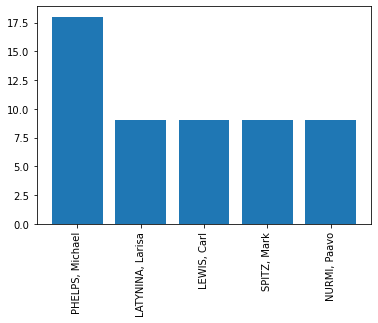

In [48]:
player_with_most_medal = player[:5]
plt.bar(player_with_most_medal.index ,player_with_most_medal)
plt.xticks(rotation=90);

**5. Which player has won most number Gold Medals of medals? (Top 5)**

In [25]:
player = data['Athlete'][data['Medal']=='Gold'].value_counts()
player

PHELPS, Michael            18
LATYNINA, Larisa            9
LEWIS, Carl                 9
SPITZ, Mark                 9
NURMI, Paavo                9
                           ..
TAYLOR, Thomas              1
STICH, Michael              1
BARKER, Clifford Eugene     1
BURNHAM, Kevin              1
TILLMAN, Henry              1
Name: Athlete, Length: 8286, dtype: int64

In [26]:
print("Top 5 Player has won most number of Gold medals")
player[:5]

Top 5 Player has won most number of Gold medals


PHELPS, Michael     18
LATYNINA, Larisa     9
LEWIS, Carl          9
SPITZ, Mark          9
NURMI, Paavo         9
Name: Athlete, dtype: int64

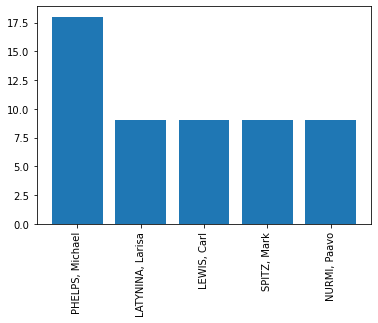

In [49]:
player_with_most_gold_medal = player[:5]
plt.bar(player_with_most_gold_medal.index ,player_with_most_gold_medal)
plt.xticks(rotation=90);

**6. In which year India won first Gold Medal in Summer Olympics?**

In [54]:
india = data[data['Country']=='IND']
india = data[data['Medal']=='Gold']

india.iloc[0 ,:]

Year                    1896
City                  Athens
Sport               Aquatics
Discipline          Swimming
Athlete        HAJOS, Alfred
Country                  HUN
Gender                   Men
Event         100M Freestyle
Medal                   Gold
Name: 0, dtype: object

In [28]:
print(f"India won first Gold Medal in {india.loc[0 ,'Year']} Summer Olympics")

India won first Gold Medal in 1896 Summer Olympics


**7. Which event is most popular in terms on number of players? (Top 5)**

In [29]:
event = data['Event'].value_counts()
event = event[:5]
event

Football            1497
Hockey              1421
Team Competition    1147
Basketball          1012
Handball             973
Name: Event, dtype: int64

In [30]:
print("Top5 Most popular in terms on number of players")
event

Top5 Most popular in terms on number of players


Football            1497
Hockey              1421
Team Competition    1147
Basketball          1012
Handball             973
Name: Event, dtype: int64

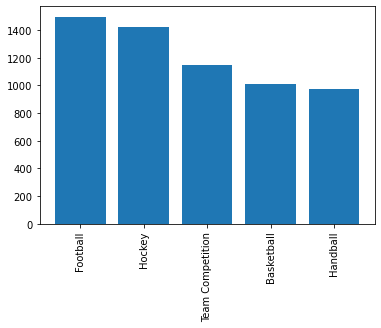

In [56]:
plt.bar(event.index ,event)
plt.xticks(rotation=90);

**8. Which sport is having most female Gold Medalists? (Top 5)**

In [31]:
data['Gender'].value_counts()

Men      22743
Women     8416
Name: Gender, dtype: int64

In [32]:
female = data[data['Gender']=='Women']
female

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
416,1900,Paris,Golf,Golf,"PRATT, Daria",USA,Women,Individual,Bronze
417,1900,Paris,Golf,Golf,"ABBOTT, Margaret Ives",USA,Women,Individual,Gold
418,1900,Paris,Golf,Golf,"WHITTIER, Pauline",USA,Women,Individual,Silver
639,1900,Paris,Tennis,Tennis,"JONES, Marion",ZZX,Women,Mixed Doubles,Bronze
640,1900,Paris,Tennis,Tennis,"ROSENBAUM, Hedwig",ZZX,Women,Mixed Doubles,Bronze
...,...,...,...,...,...,...,...,...,...
31116,2012,London,Wrestling,Wrestling Freestyle,"VOLOSOVA, Lubov",RUS,Women,Wf 63 KG,Bronze
31121,2012,London,Wrestling,Wrestling Freestyle,"VOROBIEVA, Natalia",RUS,Women,Wf 72 KG,Gold
31122,2012,London,Wrestling,Wrestling Freestyle,"HRISTOVA, Stanka Zlateva",BUL,Women,Wf 72 KG,Silver
31123,2012,London,Wrestling,Wrestling Freestyle,"MANYUROVA, Guzel",KAZ,Women,Wf 72 KG,Bronze


In [33]:
feamale_medal = feamale['Sport'][female['Medal']=='Gold'].value_counts()
feamale_medal[:5]

NameError: name 'feamale' is not defined

In [ ]:
print("Top5 sport having most female Gold Medalists")
feamale_medal[:5]